In [2]:
import io
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# **Оценка выживаемости пассажиров**


# 1. Загружаем данные

Загружаем файл из локальной директории на компьютере:

In [3]:
uploaded = files.upload()
for filename in uploaded:
    data_raw = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving titanic.csv to titanic.csv


В данном датасете представлена информация о 1309 пассажирах «Титаника». Для каждого из них указаны следующие характеристики: факт выживания, класс обслуживания, имя, пол, возраст, количество братьев/сестер или супругов на борту, количество родителей или детей на борту, номер билета, его стоимость, место в корабле и порт посадки (Шербур, Куинстаун, Саутгемптон).

Первым шагом проанализируем структуру таблицы: определим количество записей (пассажиров) и перечень признаков (столбцов).

In [5]:
data_raw.shape

(1309, 12)

In [6]:
data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,"8,05",NaN,S
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,"108,9",C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,"38,5",0,0,SOTON/O.Q. 3101262,"7,25",NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,"8,05",NaN,S


Метод `data_raw.head()` отображает первые строки таблицы

In [7]:
data_raw.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,"8,4583",NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,"51,8625",E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,"11,1333",NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,"30,0708",NaN,C


Последние строки:

In [8]:
data_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,"8,05",NaN,S
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,"108,9",C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,"38,5",0,0,SOTON/O.Q. 3101262,"7,25",NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,"8,05",NaN,S
1308,1309,1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,"22,3583",NaN,C


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  1309 non-null   int64 
 1   Survived     1309 non-null   int64 
 2   Pclass       1309 non-null   int64 
 3   Name         1309 non-null   object
 4   Sex          1309 non-null   object
 5   Age          1046 non-null   object
 6   SibSp        1309 non-null   int64 
 7   Parch        1309 non-null   int64 
 8   Ticket       1309 non-null   object
 9   Fare         1308 non-null   object
 10  Cabin        295 non-null    object
 11  Embarked     1307 non-null   object
dtypes: int64(5), object(7)
memory usage: 122.8+ KB


Мы видим, что столбцы (признаки) имеют имена

- `PassengerId` - Id пассажира
- `Survived` - выжил пассажир(1) или нет(0)
- `PClass` - номер класса места
- `Name` - имя пассажира
- `Sex` - пол
- `Age` - возраст
- `SibSp` - наличие на корабле у пассажира брата/сестры, мужа/жены
- `Parch` - наличие на кораблей детей/родителей
- `Ticket` - номер(индекс) билета
- `Fare` - цена билета
- `Cabin` - место пассажира
- `Embarked` - пункт отправления

Признак `PClass` - номинальный (категориальный), `Survived`, `Sex` - бинарный,  `PassengerId`, `Age`, `SibSp`, `Parch`, `Fare` - количественный (числовой), остальные признаки - текстовые.

Требуется предсказать бинарный признак `Survived` по остальным признакам. Это *задача восстановления регрессии*.

Столбцы `'Pclass'` и `'Survived'` содержат категориальные значения. Пока они имеют тип `'int64`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [10]:
data_raw['Pclass'] = data_raw['Pclass'].astype('category')
data_raw['Survived'] = data_raw['Survived'].astype('category')

In [11]:
data_raw['Pclass'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

In [12]:
data_raw['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

Столбцы `'Age'` и `'Fare'` содержат категориальные значения. Пока они имеют тип `'object`'. Заменим тип на числовой:

In [13]:
data_raw['Age'] = pd.to_numeric(data_raw['Age'], errors='coerce')
data_raw['Fare'] = pd.to_numeric(data_raw['Fare'], errors='coerce')

Информация о числовых признаках:

In [14]:
data_raw.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1001.000000,1309.000000,1309.000000,229.000000
mean,655.000000,30.147852,0.498854,0.385027,33.179039
std,378.020061,14.179637,1.041658,0.865560,43.788149
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,13.000000
50%,655.000000,28.000000,0.000000,0.000000,26.000000
75%,982.000000,39.000000,1.000000,0.000000,30.000000
max,1309.000000,80.000000,8.000000,9.000000,263.000000


Информация о категориальных признаках

In [15]:
data_raw.describe(include=['category'])

,Survived,Pclass
count,1309,1309
unique,2,3
top,0,3
freq,809,709


## Пропущенные значения:

In [16]:
data_raw.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,308
SibSp,0
Parch,0
Ticket,0
Fare,1080


In [17]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['Age', 'Fare', 'Cabin', 'Embarked']

Столбец Cabin содержит значительное количество пропусков, что затрудняет его корректное восстановление. Поэтому наиболее рациональным решением будет его исключение из анализа. Для столбцов Embarked, Age и Fare пропущенные значения можно заполнить наиболее часто встречающимся значением в столбце.

In [18]:
data_raw = data_raw.drop('Cabin', axis=1)

mode_age = data_raw['Age'].mode()[0]
data_raw['Age'].fillna(mode_age, inplace=True)

mode_embarked = data_raw['Embarked'].mode()[0]
data_raw['Embarked'].fillna(mode_embarked, inplace=True)

mode_fare = data_raw['Fare'].mode()[0]
data_raw['Fare'].fillna(mode_fare, inplace=True)

/tmp/ipython-input-1483742009.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Age'].fillna(mode_age, inplace=True)
/tmp/ipython-input-1483742009.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Выполним отбор признаков для кластеризации

In [19]:
y_true = data_raw['Survived'].astype(int).values

In [20]:
X = data_raw.drop(columns=['Survived', 'Name', 'Ticket'])

Преобразование категориальных признаков в числовые

In [21]:
X = pd.get_dummies(X, drop_first=True)

Масштабирование

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. PCA (понижение размерности до 2D)

In [23]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Доля объяснённой дисперсии:", pca.explained_variance_ratio_)

Доля объяснённой дисперсии: [0.19346328 0.16622801]


Двумерное представление данных сохраняет около трети исходной дисперсии. Несмотря на потерю части информации, полученная проекция позволяет проводить предварительный визуальный анализ кластерной структуры и выявлять основные закономерности в данных, что соответствует стандартной практике исследовательского анализа данных.

## 3. Кластеризация

# 3.1. KMeans

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3.2. DBSCAN

In [25]:
dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3.3. OPTICS

In [26]:
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X_scaled)

## 4. Визуализация кластеров(PCA)

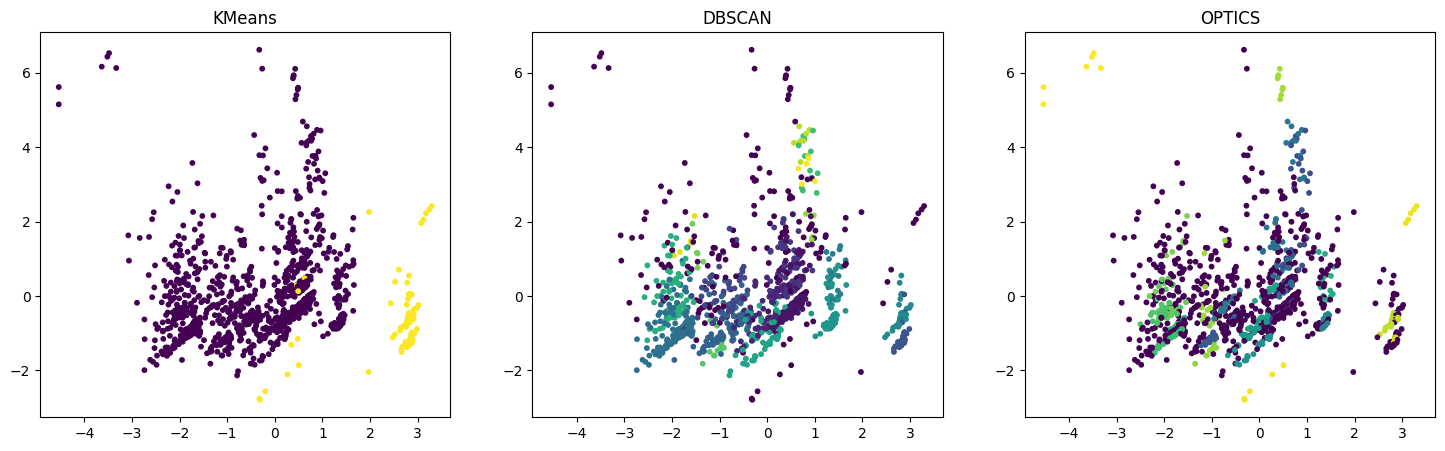

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axes[0].set_title('KMeans')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10)
axes[1].set_title('DBSCAN')

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=optics_labels, cmap='viridis', s=10)
axes[2].set_title('OPTICS')

plt.show()

Все три алгоритма (KMeans, DBSCAN и OPTICS) показали схожие результаты, где точки данных распределены в диапазоне примерно от -4 до 3 по обеим осям PCA, образуя непрерывное облако без четких разделений. Несмотря на применение разных подходов к кластеризации ни один алгоритм не смог выделить обособленные, хорошо разделимые кластеры, что указывает на отсутствие явной внутренней структуры в данных. Это может свидетельствовать о том, что  взаимосвязи между объектами требуют других методов анализа или дополнительной обработки признаков.

# 5. Сравнение кластеров с истинными метками

Для сравнения используем качество предсказания на основе кластеров

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

for name, labels in [('KMeans', kmeans_labels),
                     ('DBSCAN', dbscan_labels),
                     ('OPTICS', optics_labels)]:

    X_cluster = labels.reshape(-1, 1)

    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X_cluster, y_true, cv=5, scoring='accuracy')

    print(f"\n{name}:")
    print(f"  Accuracy using only cluster labels: {scores.mean():.4f} (+/- {scores.std():.4f})")

    baseline = max(y_true.mean(), 1 - y_true.mean())
    print(f"  Baseline (majority class): {baseline:.4f}")



KMeans:
  Accuracy using only cluster labels: 0.6180 (+/- 0.0006)
  Baseline (majority class): 0.6180

DBSCAN:
  Accuracy using only cluster labels: 0.6127 (+/- 0.0076)
  Baseline (majority class): 0.6180

OPTICS:
  Accuracy using only cluster labels: 0.6211 (+/- 0.0055)
  Baseline (majority class): 0.6180


Кластеризация неэффективна для прогнозирования выживаемости — точность моделей на основе меток кластеров (0.612-0.621) практически не отличается от базового уровня (0.618). Для решения задачи необходимы другие методы обучения.